In [61]:
using Revise, Statistics, LaTeXStrings, DSP, StatsBase
using Formatting, MAT, ControlSystems
using CairoMakie, Makie
using ColorSchemes
import ColorSchemes: nord, tab10, Dark2_8

printx(x,N) = sprintf1("%10.$(N)f",x)


# fg = :black  # nord[5]
# gg = :grey   # nord[3]
fg = nord[5]
gg = nord[3]
bg = :transparent

cscheme = Dark2_8

set_theme!(Theme(
    fontsize = 20,
    palette = ( color = cscheme,),
    markerstrokewidth=0.1,
    Axis = (
        backgroundcolor = bg,
        xtickcolor = fg, ytickcolor = fg,
        xgridcolor = gg, ygridcolor = gg,
        xlabelcolor = fg, ylabelcolor = fg,
        xticklabelcolor = fg, yticklabelcolor = fg,
        topspinecolor = fg, bottomspinecolor = fg,
        leftspinecolor = fg, rightspinecolor = fg,
        titlecolor = fg,
    ),
    Legend = (
        bgcolor = bg,
        labelcolor = fg, titlecolor = fg,
        framevisible = false, margin=(0,0,0,0)
    )
))

In [2]:
# function covpred(x, p, r)
#     N = length(x)
#     # Simply write the definition of the autocorrelationfunction
#     acf(k) = sum([x[n+1]*x[n-k+1] for n=k:N-1])
#     # Use ACF to find the covariance matrix
#     R = [ acf(abs(i-j)) for i=0:p, j=0:p ]
#     a = R \ [ x[1]; zeros(p)]
#     err = mean((x - filt(1.0plotting cx
    end
    X = X[p+1:N-1,:] 
    b = x[p+2:N]
    a = [ 1; -X \ b ]
    err = mean((x - filt(1.0, a, [1; zeros(N-1)])).^2)
    return [a, err]
end

corrpred (generic function with 1 method)

In [3]:
x = filt(1.0, [1,0.2,0.3], [1; zeros(100)])
@show covpred(x, 2, 0);
@show corrpred(x, 2, 0);

covpred(x, 2, 0) = Any[[1.0, 0.20000000000000004, 0.3], 4.523690588545417e-35]
corrpred(x, 2, 0) = Any[[1.0, 0.19999999999999998, 0.29999999999999993], 5.611008013959383e-35]


In [4]:
ARdata = matread("ARdata.mat")
x1 = ARdata["y1"]
x2 = ARdata["y2"]
x3 = ARdata["y3"]
a1 = vec(Real.(ARdata["a1"]))

4-element Vector{Float64}:
  1.0
 -1.9099026535611552
  1.3989016800967666
 -0.4949

P = tf([1.0], a1) = TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
                             1.0
-------------------------------------------------------------
1.0s^3 - 1.9099026535611552s^2 + 1.3989016800967666s - 0.4949

Continuous-time transfer function model


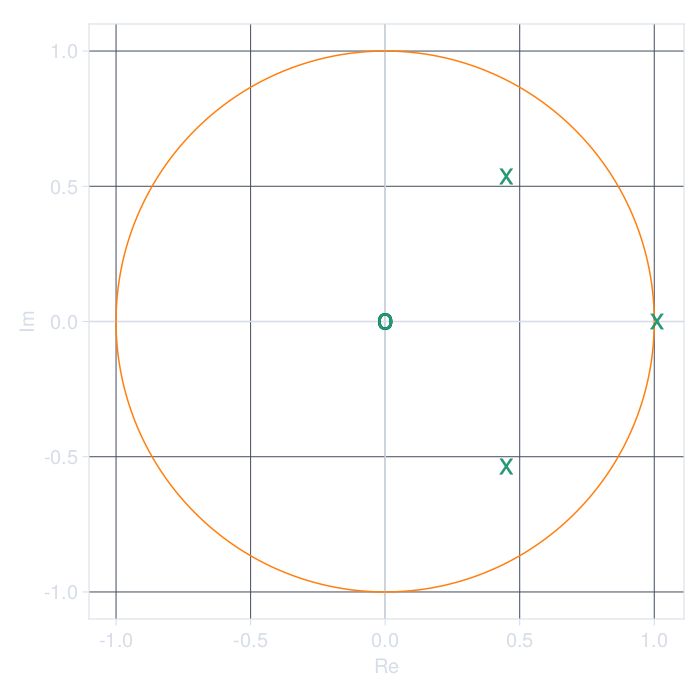

In [62]:
@show P = tf([1.0], a1)

function zplane!(ax::Axis, sys::LTISystem; color=cscheme[1])
    p = poles(sys)
    z = tzeros(sys)
    z = [0+0im, 0im, 0im]
    vlines!(ax, 0, color=fg)
    hlines!(ax, 0, color=fg)
    unit_circle = exp.(1im*(0:0.01:2π))
    lines!(ax, real(unit_circle), imag(unit_circle), color=tab10[2])
    if !isempty(p)
        scatter!(ax, real(p), imag(p), marker='x', color=color, markersize=30)
    end
    if !isempty(z)
        scatter!(ax, real(z), imag(z), marker='o', color=color, markersize=30)
    end
end

F = Figure(backgroundcolor=bg, resolution=(700,700))
ax = Axis(F[1,1], aspect=AxisAspect(1), xlabel="Re", ylabel="Im")
zplane!(ax, P)
F